In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [66]:
data1 = pd.read_csv("/content/gdrive/MyDrive/data1.csv", encoding="latin1")
data2 = pd.read_csv("/content/gdrive/MyDrive/data2.csv", encoding="latin1")

<ipython-input-66-1d5a45310eed>:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/gdrive/MyDrive/data1.csv", encoding="latin1")


## filtracion de datos

<Axes: >

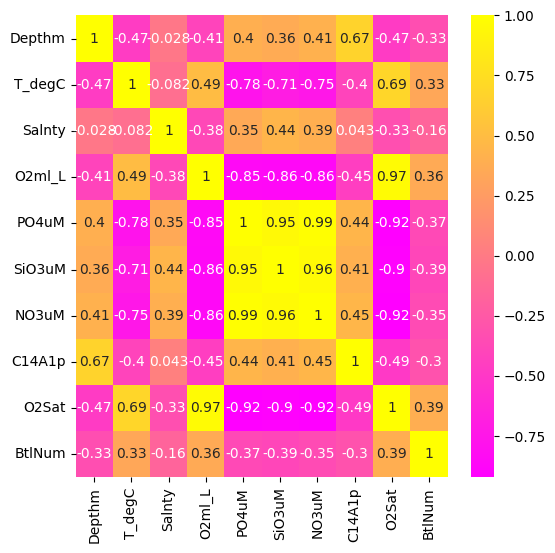

In [52]:
#PARA DATA1
'''no entendi bien las intrucciones ni cual seria la variable objetivo a predecir, supongo que seria "depthm", pero bueno si es el caso aparte del "t_degc"
  añadi otras variables que se relacionaban con "depthm" ya sea de forma directa o inversamente'''

Gdata1 = data1.loc[:, ['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'C14A1p', 'O2Sat', 'BtlNum']] #SELECION DE COLUMNAS Y CREACION DE UN NUEVO DATA FRAME
Gdata1 = Gdata1.replace(0, np.nan) #REMPLAZAR CEROS CON VALORES NULL
Gdata1 = Gdata1.dropna()  #ELIMINAR DATOS NULLL DEL DATAFRAME

#HEADMAP PARA COMPROBAR LA RELACION CON DEPTHM
plt.figure(figsize = (6,6))
sns.heatmap(Gdata1.corr(),cmap="spring",annot = True)

In [102]:
#DATA2

#en esta son pocas las variables que representa una buena correlacion, pero lo dejaremos asi 
Gdata2 = data2.drop('Type', axis=1)  #   ELIMINACION DE COLUMNA TYPE POR CONTENER STRINGS
#VARIABLE ONJETIVO : Visual (es la unica con 5 valores), type tenia 7 valores posibles


Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF'],
      dtype='object')

##modelo de regresion base
Construye un modelo de regresión base utilizando cualquier
algoritmo de regresión de tu elección. (5 puntos)


In [78]:
#MODELO DE REGRESION BASE DATA1
#CEEAR X y Y
X = Gdata1.iloc[:,1:]   #selecionar todas las columnas menos la primera
Y = Gdata1["Depthm"]

#CREAR VARIABLES TEST Y TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  =0.3, random_state = 42)

lr = LinearRegression() #crear instancia del modelo

lr.fit(X_train, y_train) #entrenamiento del modelo

y_pred = lr.predict(X_test) #creamos un datos de prediccion

score = lr.score(X_test, y_test)
#accuraci = accuracy_score(y_test, y_pred)
print(f"el acuaraci del modelo base es {score}")

el acuaraci del modelo base es 0.5646858131134453


## Breve descripcion 
Proporcione una breve descripción del algoritmo y sus suposiciones. (5 puntos)

- _es un modelo de aprendizaje supervisado utilizado para la predicción de valores numéricos continuos.
El objetivo de la regresión lineal es encontrar una relación lineal entre una variable de entrada (también conocida como variable independiente o predictor) y una variable de salida (también conocida como variable dependiente o respuesta) considero que las predicciones deberian ser buenas ya que la temperatura del agua deberia decender entre mas profundas sean_

## Realice una validación cruzada
utilizando una validación cruzada de 5 veces (5 puntos) e
informe la media y la desviación estándar de las puntuaciones de validación cruzada (5puntos).


In [85]:
#MALLL DE VALORES
gird = {
    'fit_intercept' : [True, False],
    'copy_X': [False, True],
    'n_jobs' : [None, 1, -1],
    'positive' : [False, True]
}

lr_cv = GridSearchCV(estimator = LinearRegression(), param_grid=gird, cv = 5)
lr_cv.fit(X_train, y_train)

media = np.mean(lr_cv.cv_results_['mean_test_score'])
desviacion = np.std(lr_cv.cv_results_['std_test_score'])
print("Media de los resultados de validación cruzada: {:.3f}".format(media))
print("Desviación estándar de los resultados de validación cruzada: {:.3f}".format(desviacion))
print("Mejores hiperparámetros:")
print(lr_cv.best_params_)


Media de los resultados de validación cruzada: -0.201
Desviación estándar de los resultados de validación cruzada: 0.034
Mejores hiperparámetros:
{'copy_X': False, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


## porque es importante la validacion cruzada?
Explique por qué la validación cruzada es importante para evaluar el rendimiento de su modelo. (5 puntos)

- _esta tecnica nos permite segmentar los datos en partes mas pequñas y evaluarlos con diferentes hiperparametros y evaluarlos entre ellos, esto ayuda a eliminar el sobreajuste, ademas dependiendo de los resultados de la validacion cruzado podemos determinar si el modelo es muy o poco complejo para ese set de datos, para que podamos ajustarlo_

## Ajuste de hiperparámetros 
ajuste los hiperparametos de su modelo de regresión mediante la búsqueda en malla. (5puntos)


In [98]:
#MODELO DE REGRESION BASE DATA1
#CEEAR X y Y
X = Gdata1.iloc[:,1:]   #selecionar todas las columnas menos la primera
Y = Gdata1["Depthm"]

#CREAR VARIABLES TEST Y TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  =0.3, random_state = 42)

lr = LinearRegression(copy_X=False, fit_intercept = True, n_jobs = None, positive = False) #crear instancia del modelo con hiperparametros

lr.fit(X_train, y_train) #entrenamiento del modelo

y_pred = lr.predict(X_test) #creamos un datos de prediccion

score = lr.score(X_test, y_test)
#accuraci = accuracy_score(y_test, y_pred)
print(f"el acuaraci del modelo con hiperparametros {score}")

el acuaraci del modelo con hiperparametros 0.5646858131134453


## Explica los hiperparámetros que ajustaron
Explica los hiperparámetros que ajustaron, el rango de valores que consideraron y la razón detrás de esas elecciones. (5 puntos)

- _ajuste todos los parametros del modelo ya que lo deje con los valores que tenia por defecto_
- _el rango de valores que use fueron todos los que acepatada el modelo para cada hiperparametro, ya que la mayoria eran de tipo boleano, asi que solo contaban con dos valores posibles por lo que para este no fue necesario buscar posibles valores para los hiperparametos_



## Informa los mejores hiperparámetros que encontró 
Informa los mejores hiperparámetros que encontró y la puntuación de validación cruzada correspondiente. (5 puntos)

- _estos fueron los mejores hiperparametros que encontre: Mejores hiperparámetros:
__'copy_X': False
'fit_intercept': True
'n_jobs': None
'positive': False__

- _arrojando una puntuacion de 0.5646858131134453_



## Compare el rendimiento
compare el rendimiento de su modelo de regresión ajustado con el modelo base y explique cualquier diferencia que haya observado. (5 puntos)

- _haciendo una comparacion entre ambos modelos realmente no hubo un canbio significante, ya que al momento de realizar la validacion cruzada los mejores parametros que me arrojo no cambiaban mucho de los que ya tenia por defecto, solo uno cambio, y no parecio tener gran relevancia en los resultados_

# Segunda Parte
##modelo de clasificacion



##Crea un modelo
crea modelo de clasificación base utilizando cualquier algoritmo de clasificación de tuelección. (5 puntos)


In [124]:
#MODELO DE REGRESION BASE DATA2
#CEEAR X y Y
X = Gdata2.loc[:, Gdata2.columns != 'Visual']   #selecionar todas las columnas menos la primera
Y = Gdata2["Visual"]

#CREAR VARIABLES TEST Y TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  =0.6, random_state = 42)

knn = KNeighborsClassifier()#GaussianNB() #crear instancia del modelo

knn.fit(X_train, y_train) #entrenamiento del modelo

y_pred = knn.predict(X_test) #creamos un datos de prediccion

score =knn.score(X_test, y_test)
#accuraci = accuracy_score(y_test, y_pred)
print(f"el acuaraci del modelo base es {score}")

el acuaraci del modelo base es 0.38333333333333336


##descripcion
Proporcione una breve descripción del algoritmo y sus suposiciones. (5 puntos)

- _Este modelo asume que los datos que se encuentran cerca en el espacio de características tienen etiquetas similares. Por lo tanto, para una nueva instancia, el algoritmo encuentra los k-vecinos más cercanos en el conjunto de entrenamiento y toma la etiqueta de clase más común entre ellos como la etiqueta de clase para la nueva instancia, como la varible a predecir tiene 5 posibles valores creo que este metodo puede funcionar bien ya que clasificaria en 5 posibles estados_

##validacion cruzada y media y std
Realice una validación cruzada utilizando una validación cruzada de 5 veces (5 puntos) e informe la media y la desviación estándar de las puntuaciones de validación cruzada (5puntos).

In [107]:
#MALLL DE VALORES
gird = {
    'n_neighbors' : [2,3,5,7,9],
    'weights': [None, 'uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10,20,30,40,50],
    'p' : [1,2,3,4],
    'n_jobs' : [-1,1,3]
}

knn_cv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=gird, cv = 5)
knn_cv.fit(X_train, y_train)

media = np.mean(knn_cv.cv_results_['mean_test_score'])
desviacion = np.std(knn_cv.cv_results_['std_test_score'])
print("Media de los resultados de validación cruzada: {:.3f}".format(media))
print("Desviación estándar de los resultados de validación cruzada: {:.3f}".format(desviacion))
print("Mejores hiperparámetros:")
print(knn_cv.best_params_)


Media de los resultados de validación cruzada: 0.396
Desviación estándar de los resultados de validación cruzada: 0.013
Mejores hiperparámetros:
{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 9, 'p': 3, 'weights': 'distance'}


##explicacion de validacion cruzada
Explica por qué la validación cruzada es importante para evaluar el rendimiento de tu modelo. (5 puntos)

- _lo que hace la validación cruzada es que divide los datos en partes más pequeñas para que podamos evaluarlos con diferentes configuraciones y ver cómo funciona el modelo en diferentes situaciones. Así nos aseguramos de que el modelo no se esté "sobreajustando" a los datos y que pueda generalizar bien a nuevos datos
Además, al ver cómo funciona el modelo en diferentes partes de los datos, podemos determinar si es demasiado complicado o no para ese conjunto de datos. De esta manera, podemos ajustarlo para que funcione mejor y lograr mejores resultados_

##ajuste de hiperparametros
Ajusta los hiperparámetros de su modelo de clasificación mediante la búsqueda en
cuadrícula. (5 puntos)


In [130]:
#MODELO DE REGRESION BASE DATA2
#CEEAR X y Y
X = Gdata2.loc[:, Gdata2.columns != 'Visual']   #selecionar todas las columnas menos la primera
Y = Gdata2["Visual"]

#CREAR VARIABLES TEST Y TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  =0.6, random_state = 42)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_jobs= -1, n_neighbors= 9, p= 3, weights='distance')#GaussianNB() #crear instancia del modelo

knn.fit(X_train, y_train) #entrenamiento del modelo

y_pred = knn.predict(X_test) #creamos un datos de prediccion

score =knn.score(X_test, y_test)
#accuraci = accuracy_score(y_test, y_pred)
print(f"el score del modelo base es {score}")

el score del modelo base es 0.44583333333333336


##explicacion de hiperparametros
Explica los hiperparámetros que ajustó, el rango de valores que consideró y la razón detrás de sus elecciones. (5 puntos)

- _los paramtros que ajuste fueron los dsiguientes:
algorithm, leaf_size, n_jobs, n_neighbors, p, weights, distance_
- _los rangos de valores que considere fueron todos los posibles valores que podian aceptar los parametros, esto checandolo directamente en la documentacion de sklearn, la razon por que decidi esto fue para calar todos los valores de los parametros esperando obtener un mejor score_


##informe de mejores hiperparametros
Informe los mejores hiperparámetros que encontró y la puntuación de validación cruzada correspondiente. (5 puntos)

- los mejores hiperparametros que obtube con validacion cruzada fueron los siguientes: 'algorithm': 'auto', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 9, 'p': 3, 'weights': 'distance'_

- _con una puntacion de 0.45_

##evaluacion de rendimiento
Evalúa el rendimiento de tu modelo de clasificación ajustado utilizando precisión,recuperación y puntaje F1. (5 puntos)


In [144]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(f"tiene una razon de {107/240}")
print(f"la recuperación de cada clase es {precision_score(y_test, y_pred, average='macro', zero_division=1)}")
print(f"el f1 del modelo es {f1_score(y_test, y_pred, average='micro')}")


[[19  5 19  0  0]
 [ 2  6 56  0  0]
 [16  8 82  0  0]
 [ 2  5 14  0  0]
 [ 1  0  5  0  0]]
tiene una razon de 0.44583333333333336
la recuperación de cada clase es 0.6381818181818182
el f1 del modelo es 0.44583333333333336


##explicacion de metricas
Explique el significado de estas métricas y cómo se pueden usar para evaluar el
rendimiento de un modelo de clasificación. (5 puntos)

- _La recuperación se utiliza para evaluar la capacidad del modelo para identificar correctamente todas las instancias positivas. Una alta recuperación indica que el modelo es capaz de identificar la mayoría de las instancias positivas, mientras que una baja recuperación indica que el modelo está perdiendo muchas instancias positivas_
- _La precisión es una métrica que indica la proporción de instancias clasificadas como positivas que realmente son positivas. Se calcula como:
precisión = TP / (TP + FP)_
- _El puntaje F1 se utiliza para evaluar el rendimiento general del modelo, teniendo en cuenta tanto la precisión como la recuperación. Un alto puntaje F1 indica un modelo con buena precisión y recuperación, mientras que un bajo puntaje F1 indica un modelo con baja precisión y/o baja recuperación_

- todas estan metricas tienen la funcion de evaluar que tan correctamente predice el modelo, es como un score

##comparacion de modelos
Compare el rendimiento de tu modelo de clasificación ajustado con el modelo base y explique cualquier diferencia que haya observado. (5 puntos)

_este caso, existe una mejora notable en el score de un modelo base y un modelo ajustado, en el primero obtuve un puntaje de 0.38, mientras que en el entrenado obtuve un score de 0.44_